# Partie 1: Compréhension du métier (Business Understanding)


### 1.1 Description du métier
Le dataset représente un système de location de vélos à Washington D.C., où les utilisateurs peuvent louer et rendre des vélos à différents points. Des facteurs environnementaux et contextuels comme la saison, la météo, et les jours fériés influencent le comportement de location.

### 1.2 Problématique
Prédire le nombre de vélos loués en fonction des conditions environnementales et calendaires.

### 1.3 Objectifs métier et objectifs de science des données

| **Business Objective (BO)** | **Data Science Objective (DSO)** |
|-----------------------------|----------------------------------|
| **BO1**: Optimiser la gestion des vélos disponibles en fonction de l'environnement et des infrastructures pour anticiper la demande. | **DSO1**: Utiliser les nouvelles variables (infrastructures de vélo, accessibilité des transports publics, zone d’utilisation, pollution de l’air) pour prédire le nombre de locations de vélos. |
| **BO2**: Planifier la maintenance des vélos selon l'utilisation par segment d'utilisateurs et améliorer la satisfaction. | **DSO2**: Identifier les niveaux d'activité des utilisateurs et leurs habitudes (`user_activity_level`, `user_satisfaction`) pour ajuster la maintenance et améliorer la qualité du service. |
| **BO3**: Analyser l'impact des facteurs socio-économiques et environnementaux sur la location de vélos. | **DSO3**: Modéliser la relation entre le **niveau de revenu**, l'**indice de pollution**, et d'autres variables socio-économiques (`income_level`, `air_pollution_index`, `public_transport_access`) sur l'utilisation des vélos. |


# Partie 2: Compréhension des données (Data Understanding)


## 2.1 Importer les données


In [21]:
%pip install pandas
import pandas as pd

data = pd.read_csv('datahour.csv') 


Note: you may need to restart the kernel to use updated packages.


## 2.2 Description des Variables du Dataset Bike Sharing (version init)



| **Nom de la variable** | **Description** |
|------------------------|-----------------|
| **Instant**            | Identificateur unique pour chaque enregistrement. |
| **dteday**             | Date précise de la location des vélos. |
| **season**             | Saison de l'année, codée de 1 à 4 (1: printemps, 2: été, 3: automne, 4: hiver). |
| **yr**                 | Année (0 pour 2011, 1 pour 2012). |
| **mnth**               | Mois de l'année (1 à 12). |
| **hr**                 | Heure de la journée (0 à 23). |
| **holiday**            | Indique si le jour est un jour férié (0 : non, 1 : oui). |
| **weekday**            | Jour de la semaine (0 pour dimanche, 6 pour samedi). |
| **workingday**         | Indique si le jour est un jour ouvrable (ni week-end, ni jour férié). |
| **weathersit**         | Situation météorologique : <br> 1: Clair, partiellement nuageux <br> 2: Brume + nuages <br> 3: Pluie légère, neige légère <br> 4: Fortes précipitations. |
| **temp**               | Température normalisée (valeurs divisées par 41°C, max possible). |
| **atemp**              | Température ressentie normalisée (valeurs divisées par 50°C, max possible). |
| **hum**                | Humidité relative normalisée (valeurs divisées par 100, max possible). |
| **windspeed**          | Vitesse du vent normalisée (valeurs divisées par 67, max possible). |
| **casual**             | Nombre de locations par des utilisateurs occasionnels. |
| **registered**         | Nombre de locations par des utilisateurs enregistrés. |
| **cnt**                | Nombre total de vélos loués (inclus utilisateurs occasionnels et enregistrés). |

### Remarque : 
Le dataset contient initialement des données temporelles telles que : `dteday` (date), `season` (saison), `yr` (année), `mnth` (mois), `hr` (heure), `holiday` (jour férié), `weekday` (jour de la semaine), et `workingday` (jour ouvré). Ces colonnes seront remplacées par d'autres variables non temporelles simulées afin d'enrichir le dataset avec des informations contextuelles et socio-économiques.


### Correction du Dataset :

1. **Supprimer les colonnes temporelles** :
   Les colonnes suivantes, liées au temps, seront supprimées du dataset :
   - `dteday` (date)
   - `season` (saison)
   - `yr` (année)
   - `mnth` (mois)
   - `hr` (heure)
   - `holiday` (jour férié)
   - `weekday` (jour de la semaine)
   - `workingday` (jour ouvré)

2. **Remplacer par d'autres colonnes non temporelles** :
   Afin d'enrichir le dataset, les colonnes supprimées seront remplacées par des variables non temporelles simulées :
   - `user_activity_level` : Niveau d'activité des utilisateurs (faible, moyen, élevé)
   - `user_type` : Type d'utilisateur (occasionnel ou fréquent)
   - `income_level` : Niveau de revenu moyen des utilisateurs (entre 20 000 et 100 000)
   - `zone_type` : Type de zone (résidentiel ou commercial)
   - `user_satisfaction` : Indice de satisfaction des utilisateurs (entre 1 et 5)
   - `bike_infrastructure_score` : Score de l'infrastructure cyclable (entre 1 et 10)
   - `air_pollution_index` : Indice de pollution de l'air (entre 1 et 100)
   - `public_transport_access` : Accessibilité des transports publics (entre 1 et 10)

Ces nouvelles colonnes ajoutent des informations contextuelles, socio-économiques et environnementales afin de mieux modéliser la demande de vélos.


In [82]:
# Afficher les colonnes existantes
print("Colonnes existantes:", data.columns.tolist())

# Supprimer les colonnes uniquement si elles existent
columns_to_drop = ['dteday', 'season', 'year', 'month', 'hr', 'holiday', 'day_of_week', 'workingday']
existing_columns = [col for col in columns_to_drop if col in data.columns]

if existing_columns:
    data = data.drop(columns=existing_columns,inplace=False)
else:
    print("Aucune colonne à supprimer.")


Colonnes existantes: ['instant', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'user_activity_level', 'user_type', 'income_level', 'zone_type', 'user_satisfaction', 'bike_infrastructure_score', 'air_pollution_index', 'public_transport_access']
Aucune colonne à supprimer.


In [83]:
import pandas as pd
import numpy as np

# 1. Ajout d'une colonne simulée pour le niveau d'activité des utilisateurs
data['user_activity_level'] = np.random.choice(['faible', 'moyen', 'élevé'], size=len(data))

# 2. Ajout d'une colonne simulée pour le type d'utilisateur (occasionnel ou fréquent)
data['user_type'] = np.random.choice(['occasionnel', 'frequent'], size=len(data))

# 3. Ajout d'une colonne simulée pour le niveau de revenu (par exemple, entre 20000 et 100000 unités monétaires)
data['income_level'] = np.random.randint(20000, 100000, size=len(data))

# 4. Ajout d'une colonne simulée pour le type de zone (résidentiel ou commercial)
data['zone_type'] = np.random.choice(['residentiel', 'commercial'], size=len(data))

# 5. Ajout d'une colonne simulée pour l'indice de satisfaction des utilisateurs (entre 1 et 5)
data['user_satisfaction'] = np.random.randint(1, 6, size=len(data))  # Valeurs entières entre 1 (faible) et 5 (élevé)

# 6. Ajout d'une colonne simulée pour le nombre d'infrastructures de vélo dans la zone
data['bike_infrastructure_score'] = np.random.randint(1, 11, size=len(data))  # Valeur entre 1 et 10

# 7. Ajout d'une colonne simulée pour le niveau de pollution atmosphérique (entre 1 et 100)
data['air_pollution_index'] = np.random.randint(1, 101, size=len(data))  # Valeur entre 1 (faible pollution) et 100 (haute pollution)

# 8. Ajout d'une colonne simulée pour l'accessibilité des transports publics (entre 1 et 10)
data['public_transport_access'] = np.random.randint(1, 11, size=len(data))  # Valeur entre 1 (faible accessibilité) et 10 (excellente accessibilité)

data.to_csv('datahour_v1.csv', index=False)  # Sauvegarde sans l'index




## 2.2 Description des Variables du Dataset Bike Sharing (version 1)


| **Nom de la Variable**              | **Description**                                                                                   | **Type de Donnée**   | **Plage de Valeurs**                       |
|-------------------------------------|---------------------------------------------------------------------------------------------------|----------------------|--------------------------------------------|
| `Instant`                           | Identificateur unique pour chaque enregistrement                                                 | Numérique            | 1, 2, 3, ... (identifiants uniques)       |
| `temp`                              | Température normalisée (valeurs divisées par 41°C, max possible)                                | Numérique            | entre 0 et 1                               |
| `atemp`                             | Température ressentie normalisée (valeurs divisées par 50°C, max possible)                     | Numérique            | entre 0 et 1                               |
| `hum`                               | Humidité relative normalisée (valeurs divisées par 100, max possible)                           | Numérique            | entre 0 et 1                               |
| `windspeed`                         | Vitesse du vent normalisée (valeurs divisées par 67, max possible)                             | Numérique            | entre 0 et 1                               |
| `casual`                            | Nombre de locations par des utilisateurs occasionnels                                             | Numérique            | 0 et plus                                  |
| `registered`                        | Nombre de locations par des utilisateurs enregistrés                                             | Numérique            | 0 et plus                                  |
| `cnt`                               | Nombre total de vélos loués (inclus utilisateurs occasionnels et enregistrés)                   | Numérique            | 0 et plus                                  |
| `user_activity_level`               | Niveau d'activité des utilisateurs (faible, moyen, élevé)                                       | Catégorique          | faible, moyen, élevé                       |
| `user_type`                         | Type d'utilisateur (occasionnel ou fréquent)                                                    | Catégorique          | occasionnel, fréquent                      |
| `income_level`                      | Niveau de revenu moyen des utilisateurs                                                          | Numérique            | entre 20 000 et 100 000                   |
| `zone_type`                        | Type de zone (résidentiel ou commercial)                                                        | Catégorique          | résidentiel, commercial                    |
| `user_satisfaction`                | Indice de satisfaction des utilisateurs                                                           | Numérique            | entre 1 et 5                               |
| `bike_infrastructure_score`         | Score de l'infrastructure cyclable                                                                | Numérique            | entre 1 et 10                              |
| `air_pollution_index`              | Indice de pollution de l'air                                                                      | Numérique            | entre 1 et 100                             |
| `public_transport_access`           | Accessibilité des transports publics                                                               | Numérique            | entre 1 et 10                              |
| `weathersit`                       | Situation météorologique : <br> 1: Clair, partiellement nuageux <br> 2: Brume + nuages <br> 3: Pluie légère, neige légère <br> 4: Fortes précipitations | Numérique (Catégorique)          | 1, 2, 3, 4                                 |


## 2.3 Dimensions des données


In [85]:
import pandas as pd

data = pd.read_csv('datahour_v1.csv') 
print("Dimensions des données: (Nbr lignes, Nbr colonnes)", data.shape)


Dimensions des données: (Nbr lignes, Nbr colonnes) (17379, 17)


## 2.4 Afficher les premières lignes


In [86]:
data.head()


,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,user_activity_level,user_type,income_level,zone_type,user_satisfaction,bike_infrastructure_score,air_pollution_index,public_transport_access
0,1.0,1.0,0.224490,0.2879,0.81,0.0,3.0,13.0,16.0,moyen,occasionnel,64323,residentiel,2,4,72,6
1,2.0,1.0,0.204082,0.2727,0.80,0.0,8.0,32.0,40.0,faible,occasionnel,90549,commercial,5,5,83,1
2,3.0,1.0,0.204082,0.2727,0.80,0.0,5.0,27.0,32.0,faible,occasionnel,94862,residentiel,3,4,27,1
3,4.0,1.0,0.224490,0.2879,0.75,0.0,3.0,10.0,13.0,élevé,occasionnel,91347,commercial,1,8,39,10
4,5.0,1.0,0.224490,0.2879,0.75,0.0,0.0,1.0,1.0,moyen,frequent,57902,residentiel,4,1,78,6


## 2.5 Afficher les dernières lignes

In [87]:
data.tail()

,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,user_activity_level,user_type,income_level,zone_type,user_satisfaction,bike_infrastructure_score,air_pollution_index,public_transport_access
17374,17375.0,2.0,0.244898,0.2576,0.60,0.193018,11.0,108.0,119.0,faible,occasionnel,32861,commercial,1,10,35,10
17375,17375.0,2.0,0.244898,0.2576,0.60,0.193018,8.0,81.0,89.0,élevé,frequent,31286,residentiel,2,8,74,5
17376,17377.0,1.0,0.244898,0.2576,0.60,0.193018,7.0,83.0,90.0,élevé,occasionnel,43820,commercial,2,2,53,5
17377,17378.0,1.0,0.244898,0.2727,0.56,0.157870,13.0,48.0,61.0,faible,frequent,97582,residentiel,5,4,61,6
17378,17379.0,1.0,0.244898,0.2727,0.65,0.157870,12.0,37.0,49.0,faible,frequent,70232,residentiel,3,9,52,3


## 2.6 Statistiques descriptives des colonnes

In [88]:
data.describe()


,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,income_level,user_satisfaction,bike_infrastructure_score,air_pollution_index,public_transport_access
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.00000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.979285,1.424823,0.486756,0.475835,0.627239,0.223491,35.65723,153.691179,189.459060,60215.759135,2.996087,5.512688,50.447379,5.500892
std,5017.027976,0.639033,0.196498,0.171827,0.192889,0.143787,49.27117,151.268933,181.282493,22977.619583,1.416485,2.876680,28.886130,2.851211
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,20000.000000,1.000000,1.000000,1.000000,1.000000
25%,4345.500000,1.000000,0.326531,0.333300,0.480000,0.122840,4.00000,34.000000,40.000000,40529.500000,2.000000,3.000000,25.000000,3.000000
50%,8690.000000,1.000000,0.489796,0.484800,0.630000,0.228047,17.00000,115.000000,142.000000,60285.000000,3.000000,5.000000,50.000000,6.000000
75%,13034.500000,2.000000,0.653061,0.621200,0.780000,0.298225,48.00000,220.000000,281.000000,80013.000000,4.000000,8.000000,75.000000,8.000000
max,17379.000000,4.000000,1.000000,1.000000,1.000000,1.000000,367.00000,886.000000,977.000000,99999.000000,5.000000,10.000000,100.000000,10.000000


## 2.7 Information sur les types de données

In [89]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   instant                    17379 non-null  float64
 1   weathersit                 17379 non-null  float64
 2   temp                       17379 non-null  float64
 3   atemp                      17379 non-null  float64
 4   hum                        17379 non-null  float64
 5   windspeed                  17379 non-null  float64
 6   casual                     17379 non-null  float64
 7   registered                 17379 non-null  float64
 8   cnt                        17379 non-null  float64
 9   user_activity_level        17379 non-null  object 
 10  user_type                  17379 non-null  object 
 11  income_level               17379 non-null  int64  
 12  zone_type                  17379 non-null  object 
 13  user_satisfaction          17379 non-null  int

## 2.8 Vérification des doublons

In [90]:
doublons = data.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

Nombre de doublons : 0


## 2.9 Vérification des valeurs manquantes


In [91]:
manquants = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", manquants)

Valeurs manquantes par colonne :
 instant                      0
weathersit                   0
temp                         0
atemp                        0
hum                          0
windspeed                    0
casual                       0
registered                   0
cnt                          0
user_activity_level          0
user_type                    0
income_level                 0
zone_type                    0
user_satisfaction            0
bike_infrastructure_score    0
air_pollution_index          0
public_transport_access      0
dtype: int64


# Partie 3: Préparation des données



## 3.1 Nettoyage des données

### 3.1.1 Suppression des doublons


In [92]:
data = data.drop_duplicates()


### 3.1.2 Vérification s'il y a encore des doublons après suppression

In [93]:
print(f"Nombre de doublons après suppression : {data.duplicated().sum()}")


Nombre de doublons après suppression : 0


### 3.1.3 Imputation des valeurs manquantes


In [94]:
data = data.copy()
data.fillna(method='ffill', inplace=True)


## 3.2 Transformation

In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Charger le fichier CSV
data = pd.read_csv('datahour_v1.csv')

# Créer un LabelEncoder
label_encoder = LabelEncoder()

# Liste des colonnes catégorielles à encoder
categorical_columns = [
    'user_activity_level',
    'user_type',
    'zone_type'
]

# Créer une copie du DataFrame pour les colonnes encodées
encoded_data = data.copy()

# Appliquer LabelEncoder à chaque colonne catégorielle et créer de nouvelles colonnes
for column in categorical_columns:
    # Encoder la colonne
    encoded_data[column + '_encoded'] = label_encoder.fit_transform(encoded_data[column])

# Vérifier les résultats avant de supprimer les colonnes d'origine
print(encoded_data[categorical_columns + [col + '_encoded' for col in categorical_columns]].head())

# Supprimer les colonnes d'origine
encoded_data = encoded_data.drop(columns=categorical_columns)

# Vérifier les résultats après suppression
print(encoded_data.head())

# Enregistrer les modifications dans un nouveau fichier CSV
encoded_data.to_csv('datahour_encode.csv', index=False)


  user_activity_level    user_type    zone_type  user_activity_level_encoded  \
0               moyen  occasionnel  residentiel                            1   
1              faible  occasionnel   commercial                            0   
2              faible  occasionnel  residentiel                            0   
3               élevé  occasionnel   commercial                            2   
4               moyen     frequent  residentiel                            1   

   user_type_encoded  zone_type_encoded  
0                  1                  1  
1                  1                  0  
2                  1                  1  
3                  1                  0  
4                  0                  1  
   instant  weathersit      temp   atemp   hum  windspeed  casual  registered  \
0      1.0         1.0  0.224490  0.2879  0.81        0.0     3.0        13.0   
1      2.0         1.0  0.204082  0.2727  0.80        0.0     8.0        32.0   
2      3.0         1.0  

## 3.3 Normalisation

#### Normalisation des variables numériques (MinMaxScaler)

In [109]:
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler

# Charger le fichier CSV
data = pd.read_csv('datahour_encode.csv')

# Créer instance MinMaxScaler
scaler = MinMaxScaler()


# Identifier toutes les colonnes à normaliser (incluant les colonnes encodées)
# On sélectionne toutes les colonnes à l'exception de la colonne d'identifiant (s'il y en a une)
columns_to_normalize = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normaliser toutes les colonnes
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Vérifier les résultats
print(data.head())

# Enregistrer les modifications dans un nouveau fichier CSV
data.to_csv('datahour_normalisation.csv', index=False)


    instant  weathersit      temp   atemp   hum  windspeed    casual  \
0  0.000000         0.0  0.224490  0.2879  0.81        0.0  0.008174   
1  0.000058         0.0  0.204082  0.2727  0.80        0.0  0.021798   
2  0.000115         0.0  0.204082  0.2727  0.80        0.0  0.013624   
3  0.000173         0.0  0.224490  0.2879  0.75        0.0  0.008174   
4  0.000230         0.0  0.224490  0.2879  0.75        0.0  0.000000   

   registered       cnt  income_level  user_satisfaction  \
0    0.014673  0.015369      0.554044               0.25   
1    0.036117  0.039959      0.881874               1.00   
2    0.030474  0.031762      0.935787               0.50   
3    0.011287  0.012295      0.891849               0.00   
4    0.001129  0.000000      0.473781               0.75   

   bike_infrastructure_score  air_pollution_index  public_transport_access  \
0                   0.333333             0.717172                 0.555556   
1                   0.444444             0.828283 

## 3.4 Création de nouvelles fonctionnalités (Feature Engineering)

#### Extraction des caractéristiques de la date

In [120]:
data = pd.read_csv('datahour_encode.csv')

# 1. Interaction entre Température et Humidité
data['temp_hum_interaction'] = data['temp'] * data['hum']

# 2. Ratio des Utilisateurs Occasionnels par Rapport aux Utilisateurs Enregistrés
data['casual_registered_ratio'] = data['casual'] / (data['registered'] + 1)

# 3. Binarisation de la Température
data['high_temp'] = (data['temp'] > 0.5).astype(int)

# 4. Score d'Expérience Utilisateur
data['user_experience_score'] = data['user_satisfaction'] + data['bike_infrastructure_score']

# 5. Moyenne des Locations par Type d'Utilisateur
user_type_avg_rentals = data.groupby('user_type_encoded')['cnt'].mean().reset_index()
user_type_avg_rentals.columns = ['user_type_encoded', 'avg_rentals']
data = data.merge(user_type_avg_rentals, on='user_type_encoded', how='left')

# Vérifier les nouvelles fonctionnalités
print(data[['temp_hum_interaction', 'casual_registered_ratio', 'high_temp', 'user_experience_score']].head())

data.to_csv('datahour_avec_nouvelles_fonctionnalites.csv', index=False)






   temp_hum_interaction  casual_registered_ratio  high_temp  \
0              0.181837                 0.214286          0   
1              0.163265                 0.242424          0   
2              0.163265                 0.178571          0   
3              0.168367                 0.272727          0   
4              0.168367                 0.000000          0   

   user_experience_score  
0                      6  
1                     10  
2                      7  
3                      9  
4                      5  


# Partie 4: Modélisation


## 4.1 Séparation des features et de la cible (X et y)


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('datahour_avec_nouvelles_fonctionnalites.csv')
# Définir les caractéristiques et la variable cible
X = data.drop(columns=['cnt'])  # Toutes les colonnes sauf 'cnt'
y = data['cnt']  # Variable cible
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Créer une instance du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')




Mean Squared Error: 423.71
R^2 Score: 0.99


## 4.2 Validation croisée

In [122]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Inverse des scores négatifs
print(f'Cross-validated MSE: {np.mean(mse_scores):.2f}')


Cross-validated MSE: 537.81


## 4.3 KNN



In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Charger les données
data = pd.read_csv('datahour_avec_nouvelles_fonctionnalites.csv')

# Définir les caractéristiques et la variable cible
X = data.drop(columns=['cnt'])  # Toutes les colonnes sauf 'cnt'
y = data['cnt']  # Variable cible

# Normaliser les caractéristiques
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer une instance du modèle KNN avec le meilleur k trouvé
best_k = 7  # Le meilleur k trouvé
knn_model = KNeighborsRegressor(n_neighbors=best_k)

# Entraîner le modèle
knn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# Évaluation du modèle
mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f'Mean Squared Error (KNN avec k={best_k}): {mse_knn:.2f}')
print(f'R^2 Score (KNN avec k={best_k}): {r2_knn:.2f}')


Mean Squared Error (KNN avec k=7): 10005.33
R^2 Score (KNN avec k=7): 0.68


In [131]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de recherche pour k
param_grid = {'n_neighbors': range(1, 21)}  # Tester k de 1 à 20

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Meilleur k trouvé :", grid_search.best_params_)


Meilleur k trouvé : {'n_neighbors': 7}


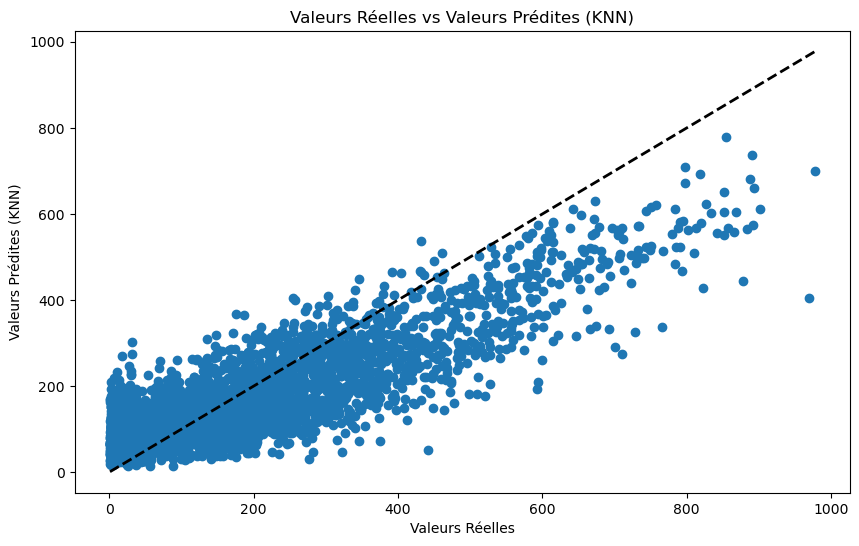

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Ligne de référence
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites (KNN)')
plt.title('Valeurs Réelles vs Valeurs Prédites (KNN)')
plt.show()


## 4.4 Prédictions


In [136]:
import pandas as pd

# Exemple de nouvelles entrées
nouvelles_entrees = {
    'weathersit': [1],  # Situation météorologique (1: Clair)
    'temp': [0.5],  # Température normalisée
    'atemp': [0.6],  # Température ressentie normalisée
    'hum': [0.4],  # Humidité relative normalisée
    'windspeed': [0.3],  # Vitesse du vent normalisée
    'casual': [5],  # Nombre de locations par utilisateurs occasionnels
    'registered': [15],  # Nombre de locations par utilisateurs enregistrés
    'cnt': [20],  # Nombre total de locations (pour référence, pas nécessaire pour prédiction)
    'income_level': [60000],  # Niveau de revenu moyen
    'user_satisfaction': [4],  # Indice de satisfaction
    'bike_infrastructure_score': [8],  # Score de l'infrastructure cyclable
    'air_pollution_index': [30],  # Indice de pollution de l'air
    'public_transport_access': [7],  # Accessibilité des transports publics
    'user_activity_level_encoded': [2],  # Encodage pour l'activité utilisateur (ex. : élevé)
    'user_type_encoded': [1],  # Encodage pour le type d'utilisateur (ex. : fréquent)
    'zone_type_encoded': [0],  # Encodage pour le type de zone (ex. : résidentiel)
    'temp_hum_interaction': [0.5 * 0.4],  # Interaction entre temp et hum
    'casual_registered_ratio': [5 / (5 + 15)],  # Ratio des utilisateurs occasionnels
    'high_temp': [1 if 0.5 > 0.5 else 0],  # Flag pour haute température
    'user_experience_score': [4],  # Score d'expérience utilisateur
    'avg_rentals': [10]  # Exemple de moyenne des locations
}

# Créer un DataFrame pour les nouvelles entrées
df_nouvelles_entrees = pd.DataFrame(nouvelles_entrees)

# Vérifier le nombre de colonnes
print("Nombre de colonnes dans les nouvelles entrées :", df_nouvelles_entrees.shape[1])

# Vérifier les colonnes
print("Nouvelles Entrées:\n", df_nouvelles_entrees)

# Faire des prédictions avec le modèle KNN
predictions = knn_model.predict(df_nouvelles_entrees)

# Afficher les prédictions
print("Prédictions des locations de vélos :", predictions)


Nombre de colonnes dans les nouvelles entrées : 21
Nouvelles Entrées:
    weathersit  temp  atemp  hum  windspeed  casual  registered  cnt  \
0           1   0.5    0.6  0.4        0.3       5          15   20   

   income_level  user_satisfaction  ...  air_pollution_index  \
0         60000                  4  ...                   30   

   public_transport_access  user_activity_level_encoded  user_type_encoded  \
0                        7                            2                  1   

   zone_type_encoded  temp_hum_interaction  casual_registered_ratio  \
0                  0                   0.2                     0.25   

   high_temp  user_experience_score  avg_rentals  
0          0                      4           10  

[1 rows x 21 columns]
Prédictions des locations de vélos : [109.14285714]


c:\Users\hatem\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


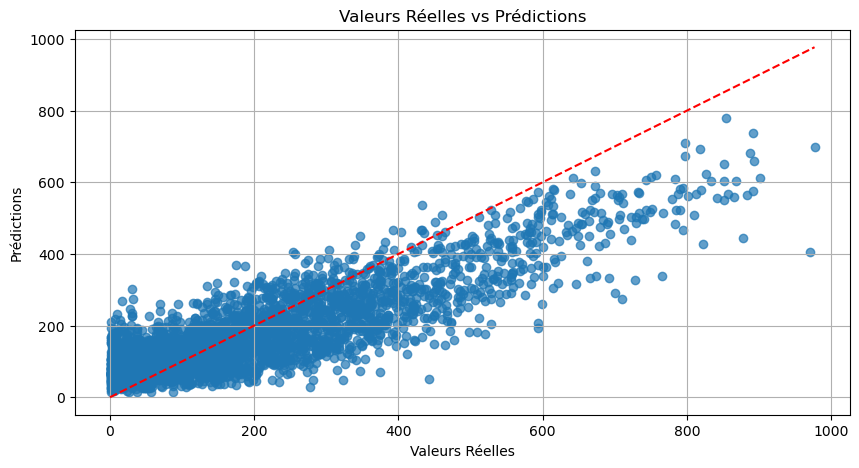

In [137]:
import matplotlib.pyplot as plt

# Comparer les valeurs réelles et prédites
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # ligne y=x
plt.grid()
plt.show()


# Partie 5: Évaluation du modèle


## 5.1 Évaluation des performances du modèle (MAE, RMSE, R2)


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R² : {r2}")

MAE : 104.83073198732485
RMSE : 139.32005002587303
R² : 0.3865630528505267


# Partie 6: Déploiement


### Étapes du déploiement :
1. **Enregistrer le modèle** : Vous pouvez utiliser `joblib` ou `pickle` pour sauvegarder votre modèle.
2. **Utiliser Flask ou Streamlit** pour déployer une API ou une application web qui effectue les prédictions en temps réel.
3. **Surveiller les performances** du modèle en production et réentraîner si nécessaire.


### Enregistrement du modèle dans un fichier :



In [57]:
import joblib

# Sauvegarder le modèle
joblib.dump(modele, 'modele_location_velos.pkl')

# Charger le modèle plus tard
modele_charge = joblib.load('modele_location_velos.pkl')